## Import

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F


from torchvision import transforms

In [66]:
import pandas as pd
import numpy as np

import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

## Preview

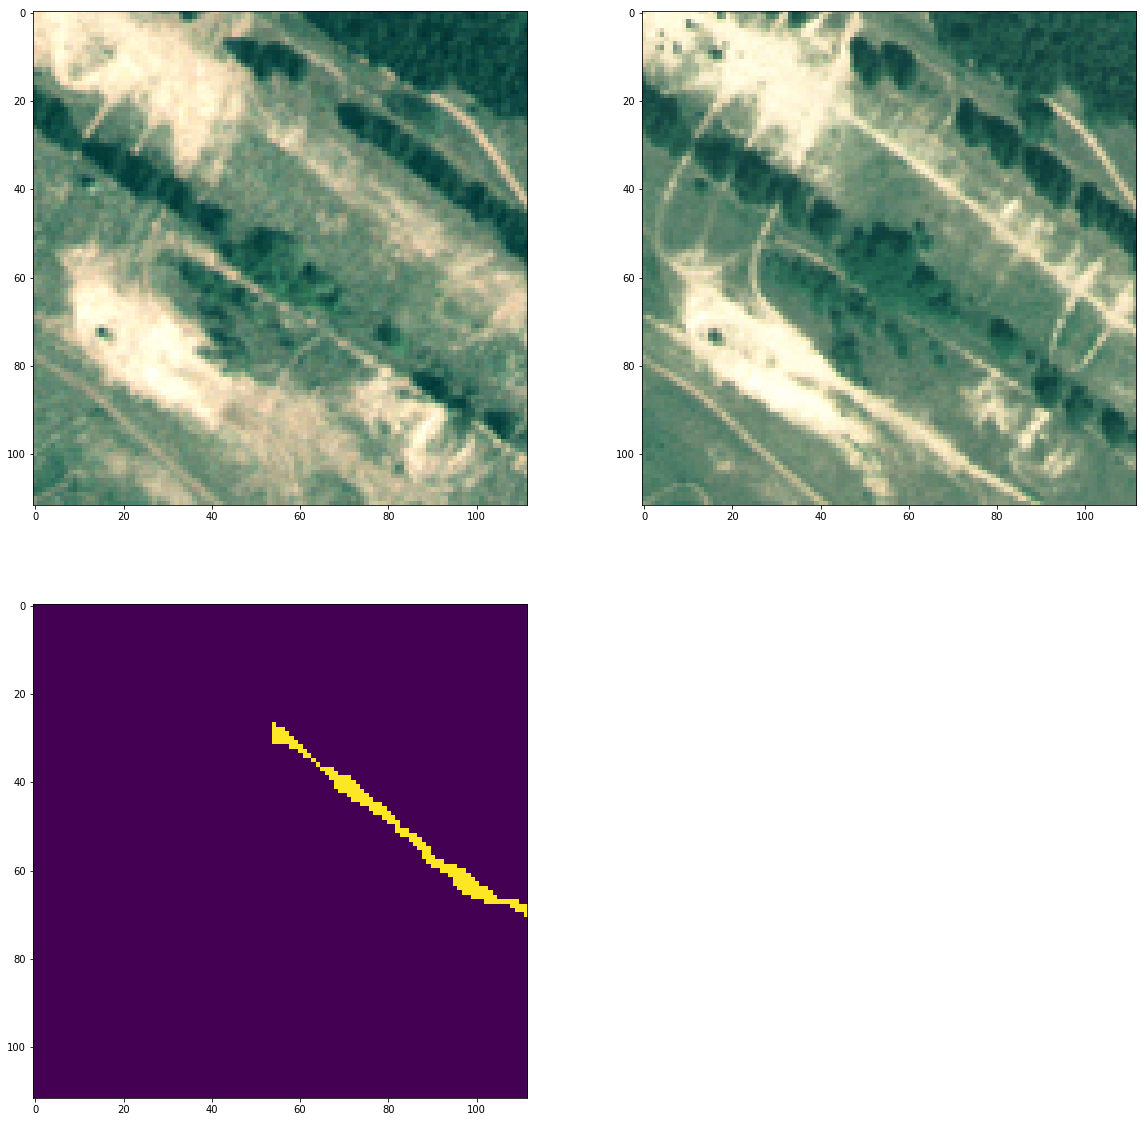

In [67]:
img1_path = 'datasets/train/Szada_Scene1_img1_Clip4_View0.png'
img2_path = 'datasets/train/Szada_Scene1_img2_Clip4_View0.png'
gt_path = 'datasets/trainGT/Szada_Scene1_gt_Clip4_View0.png'

img1 = mpimg.imread(img1_path)
img2 = mpimg.imread(img2_path)
gt = mpimg.imread(gt_path)

plt.figure(figsize=(20,20))

plt.subplot(221)
plt.imshow(img1)
plt.subplot(222)
plt.imshow(img2)
plt.subplot(223)
plt.imshow(gt)

plt.show()

## Input

In [4]:
data_transforms = transforms.Compose([
    transforms.ToTensor() # 转化为Tensor
])

x1 = data_transforms(img1)
x2 = data_transforms(img2)

## Model

In [5]:
class SiameseNet(nn.Module):
    def __init__(self):
        super(SiameseNet, self).__init__()
        self.featureExtract = nn.Sequential(
            nn.Conv2d(3, 64, 3, padding=1),
            nn.Conv2d(64, 64, 3, padding=1),
            nn.Conv2d(64, 64, 5, padding=2),
            nn.Conv2d(64, 32, 5, padding=2),
            nn.Conv2d(32, 16, 1, padding=0),
        )
        

    def forward(self,x1,x2):
        x1 = self.featureExtract(x1)
        x2 = self.featureExtract(x2)        
        x = F.pairwise_distance(x1,x2,p=2)
        
        return x

## Output

In [83]:
data = pd.read_csv('./data.csv')
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')
data.shape[0]

3888

In [1]:
# %load test.py
import torch
import torch.nn as nn
from torch.utils.data import DataLoader

import torchvision
from torchvision import transforms

import matplotlib.pylab as plt
import numpy as np

from models import SiameseNet
from data_loader import myData
from configs import Config
from utils import log

log = log('./log.log')

cf = Config()
batch_size = cf.batch_size
num_epochs = cf.num_epochs
num_workers = cf.num_workers
leaning_rate = cf.learning_rate
momentum = cf.momentum
weight_decay = cf.weight_decay
show_every = cf.show_every
save_every = cf.save_every
test_every = cf.test_every
save_path = cf.save_path

test_batch = 156  # 100 or 200
test_epoch = 100

model_name = '{}Siamese-BCELoss-epoch-{}-batch-{}.pt'.format(
    save_path, test_batch, test_epoch)

log.info(model_name)

net = SiameseNet().to('cuda:0')
net.load_state_dict(torch.load(model_name))
net.eval()

myTransform = transforms.Compose([
    transforms.ToTensor()
])

testSet = myData(dataPath='./test.csv',
                 transform=myTransform)
testLoader = DataLoader(dataset=testSet,
                        num_workers=num_workers,
                        shuffle=False,
                        batch_size=batch_size)



In [2]:
if cf.use_gpu:
    device = torch.device("cuda:0")
    log.info(device)
    net = net.to(device)
    
def binaryImage(img):
#     print(img.size)
    img = np.array(img)
    print(img.shape)
    img[img>0]=255
    return img

deTransform = transforms.Compose([
    transforms.ToPILImage(),
])

(4, 112, 112) (4, 1, 112, 112)


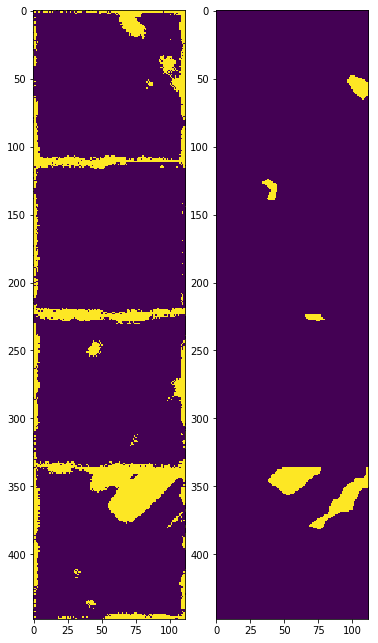

In [114]:
for batch, data in enumerate(testLoader, 1):
#     img1, img2, gt, gt_name = data[0].to(device), data[1].to(
#         device), data[2].to(device), data[3]
#     output = net(img1, img2)

#     bs,c,h,w = gt.shape
#     out_img = deTransform(output.reshape((1, 112, -1)).cpu())
#     gt_img = deTransform(gt.reshape((1, 112, -1)).cpu())

#     plt.subplot(211)
#     plt.imshow(out_img,cmap='gray')
#     plt.subplot(212)
#     plt.imshow(gt_img,cmap='gray')
#     plt.show()
#     print(gt_name)
    if batch == 41:
        img1, img2, gt, gt_name = data[0].to(device), data[1].to(
            device), data[2].to(device), data[3]
        output = net(img1, img2)
        
        np_out = output.detach().cpu().numpy()
        np_gt = gt.detach().cpu().numpy()
        
        m = 5e-4
        np_out[np_out>m]=255
        np_out[np_out<m]=0

        print(np_out.shape,np_gt.shape)
        plt.figure(figsize=(6,12))
        plt.subplot(121)
        plt.imshow(np_out.reshape((448,112)))
        plt.subplot(122)
        plt.imshow(np_gt.reshape((448,112)))
        plt.show()
        break

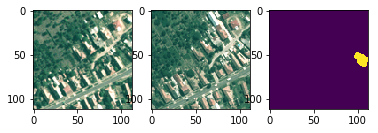

In [115]:
img1 = gt_name[0].replace('gt','img1').replace('GT','')
img1 = plt.imread(img1)
img2 = gt_name[0].replace('gt','img2').replace('GT','')
img2 = plt.imread(img2)
GT = plt.imread(gt_name[0])
plt.subplot(131)
plt.imshow(img1)
plt.subplot(132)
plt.imshow(img2)
plt.subplot(133)
plt.imshow(GT)


In [ ]:
gt_name[0].replace

In [ ]:
gt_name[0].replace

In [ ]:
gt_name[0].replace

In [34]:
from torch.autograd import Variable

dtype = torch.FloatTensor

x1 = np.random.randint(0,3,size=(4,3,2,2))

x2 = np.random.randint(0,3,size=(4,3,2,2))

x1 = Variable(torch.tensor(x1).type(dtype))
x2 = Variable(torch.tensor(x2).type(dtype))

D = torch.nn.PairwiseDistance(p=2)(x1,x2)
print(x1.shape,D.shape,x1,x2,D,sep='\n')

torch.Size([4, 3, 2, 2])
torch.Size([4, 2, 2])
tensor([[[[1., 1.],
          [0., 1.]],

         [[1., 2.],
          [0., 2.]],

         [[0., 2.],
          [0., 2.]]],


        [[[0., 1.],
          [2., 2.]],

         [[0., 2.],
          [1., 2.]],

         [[2., 2.],
          [1., 1.]]],


        [[[1., 2.],
          [1., 0.]],

         [[1., 1.],
          [0., 2.]],

         [[2., 1.],
          [0., 2.]]],


        [[[0., 0.],
          [0., 2.]],

         [[0., 1.],
          [0., 1.]],

         [[0., 1.],
          [2., 2.]]]])
tensor([[[[1., 2.],
          [1., 0.]],

         [[0., 2.],
          [1., 0.]],

         [[0., 1.],
          [2., 0.]]],


        [[[0., 2.],
          [0., 1.]],

         [[2., 1.],
          [1., 2.]],

         [[1., 2.],
          [0., 1.]]],


        [[[0., 1.],
          [0., 1.]],

         [[2., 0.],
          [2., 1.]],

         [[0., 1.],
          [0., 2.]]],


        [[[1., 0.],
          [2., 1.]],

         [[1., 1

## 自定义损失函数

In [86]:
x1 = np.random.randint(0,2,size=(8,112,112))
x2 = np.random.rand(8,112,112)

z1 = np.random.randint(0,2,size=(8,112,112))
z2 = np.random.rand(8,112,112)

x1 = torch.tensor(x1).to('cuda')
x2 = torch.tensor(x2).to('cuda')

class loss(nn.Module):
    def __init__(self):
        super(loss, self).__init__()

    def forward(self, D, Y):
        loss = 0.0
        m = 1  # 可能设置为一个可以学习的参数
        D = D.cpu().detach().numpy()
        Y = Y.cpu().detach().numpy()
        f_c = Y.sum()/Y.size
        w_u = 0.5/(1-f_c)
        w_c = 0.5/f_c
        loss = np.sum(Y*pow(np.maximum(0, m-D), 2)*w_c + (1-Y)*pow(D, 2)*w_u) / 2

        return torch.tensor(loss, requires_grad=True)

# from models import loss

criterion = loss()
output = criterion(x2,x1)
print(output.shape,output)
output.backward()

torch.Size([]) tensor(16755.2930, requires_grad=True)
